### Target:
    
    - Add Dropout Regularisation of 5%.

### Results:

    - Model has 9.4k parameters.

    - Train Accuracy = 99.19

    - Test Accuracy = 99.37

### Analysis:

    - No longer overfitting. Infact it is slighly underfitting now.

    - If pushed further will easily reach target. But we need more parameters. So we will use avgpool as last layer.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model5 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model5                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 8, 28, 28]           --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 4, 28, 28]           36                          0.38%
│    └─Dropout: 2-2                      [64, 4, 28, 28]           [64, 4, 28, 28]           --                             --
│    └─ReLU: 2-3                         [64, 4, 28, 28]           [64, 4, 28, 28]           --                             --
│    └─BatchNorm2d: 2-4                  [64, 4, 28, 28]           [64, 4, 28, 28]           8                           0.08%
│    └─Conv2d: 2-5                       [64, 4, 28, 28]           [64, 8, 28, 28]           288               

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0077 Batch_id=937 Average Loss=0.1672 Accuracy=94.66: 100%|██████████| 938/938 [00:26<00:00, 35.57it/s]


Test set: Average loss: 0.0424, Accuracy: 9856/10000 (98.56%)

Epoch 2


Train: Batch Loss=0.0758 Batch_id=937 Average Loss=0.0663 Accuracy=97.92: 100%|██████████| 938/938 [00:25<00:00, 36.60it/s]


Test set: Average loss: 0.0385, Accuracy: 9856/10000 (98.56%)

Epoch 3


Train: Batch Loss=0.0108 Batch_id=937 Average Loss=0.0540 Accuracy=98.30: 100%|██████████| 938/938 [00:26<00:00, 35.70it/s]


Test set: Average loss: 0.0309, Accuracy: 9897/10000 (98.97%)

Epoch 4


Train: Batch Loss=0.0758 Batch_id=937 Average Loss=0.0469 Accuracy=98.49: 100%|██████████| 938/938 [00:26<00:00, 35.12it/s]


Test set: Average loss: 0.0302, Accuracy: 9901/10000 (99.01%)

Epoch 5


Train: Batch Loss=0.0115 Batch_id=937 Average Loss=0.0420 Accuracy=98.58: 100%|██████████| 938/938 [00:25<00:00, 36.47it/s]


Test set: Average loss: 0.0351, Accuracy: 9891/10000 (98.91%)

Epoch 6


Train: Batch Loss=0.1650 Batch_id=937 Average Loss=0.0388 Accuracy=98.78: 100%|██████████| 938/938 [00:29<00:00, 31.51it/s]


Test set: Average loss: 0.0289, Accuracy: 9902/10000 (99.02%)

Epoch 7


Train: Batch Loss=0.0032 Batch_id=937 Average Loss=0.0361 Accuracy=98.83: 100%|██████████| 938/938 [00:30<00:00, 30.48it/s]


Test set: Average loss: 0.0292, Accuracy: 9911/10000 (99.11%)

Epoch 8


Train: Batch Loss=0.0029 Batch_id=937 Average Loss=0.0331 Accuracy=98.88: 100%|██████████| 938/938 [00:31<00:00, 29.82it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)

Epoch 9


Train: Batch Loss=0.0113 Batch_id=937 Average Loss=0.0310 Accuracy=98.99: 100%|██████████| 938/938 [00:31<00:00, 29.66it/s]


Test set: Average loss: 0.0247, Accuracy: 9928/10000 (99.28%)

Epoch 10


Train: Batch Loss=0.2314 Batch_id=937 Average Loss=0.0302 Accuracy=99.01: 100%|██████████| 938/938 [00:31<00:00, 30.05it/s]


Test set: Average loss: 0.0224, Accuracy: 9919/10000 (99.19%)

Epoch 11


Train: Batch Loss=0.1867 Batch_id=937 Average Loss=0.0284 Accuracy=99.09: 100%|██████████| 938/938 [00:30<00:00, 30.69it/s]


Test set: Average loss: 0.0231, Accuracy: 9922/10000 (99.22%)

Epoch 12


Train: Batch Loss=0.0809 Batch_id=937 Average Loss=0.0279 Accuracy=99.09: 100%|██████████| 938/938 [00:30<00:00, 30.68it/s]


Test set: Average loss: 0.0266, Accuracy: 9909/10000 (99.09%)

Epoch 13


Train: Batch Loss=0.0044 Batch_id=937 Average Loss=0.0259 Accuracy=99.15: 100%|██████████| 938/938 [00:31<00:00, 29.56it/s]


Test set: Average loss: 0.0224, Accuracy: 9930/10000 (99.30%)

Epoch 14


Train: Batch Loss=0.0024 Batch_id=937 Average Loss=0.0259 Accuracy=99.17: 100%|██████████| 938/938 [00:30<00:00, 31.07it/s]


Test set: Average loss: 0.0228, Accuracy: 9921/10000 (99.21%)

Epoch 15


Train: Batch Loss=0.0021 Batch_id=937 Average Loss=0.0244 Accuracy=99.19: 100%|██████████| 938/938 [00:30<00:00, 30.74it/s]


Test set: Average loss: 0.0206, Accuracy: 9937/10000 (99.37%)



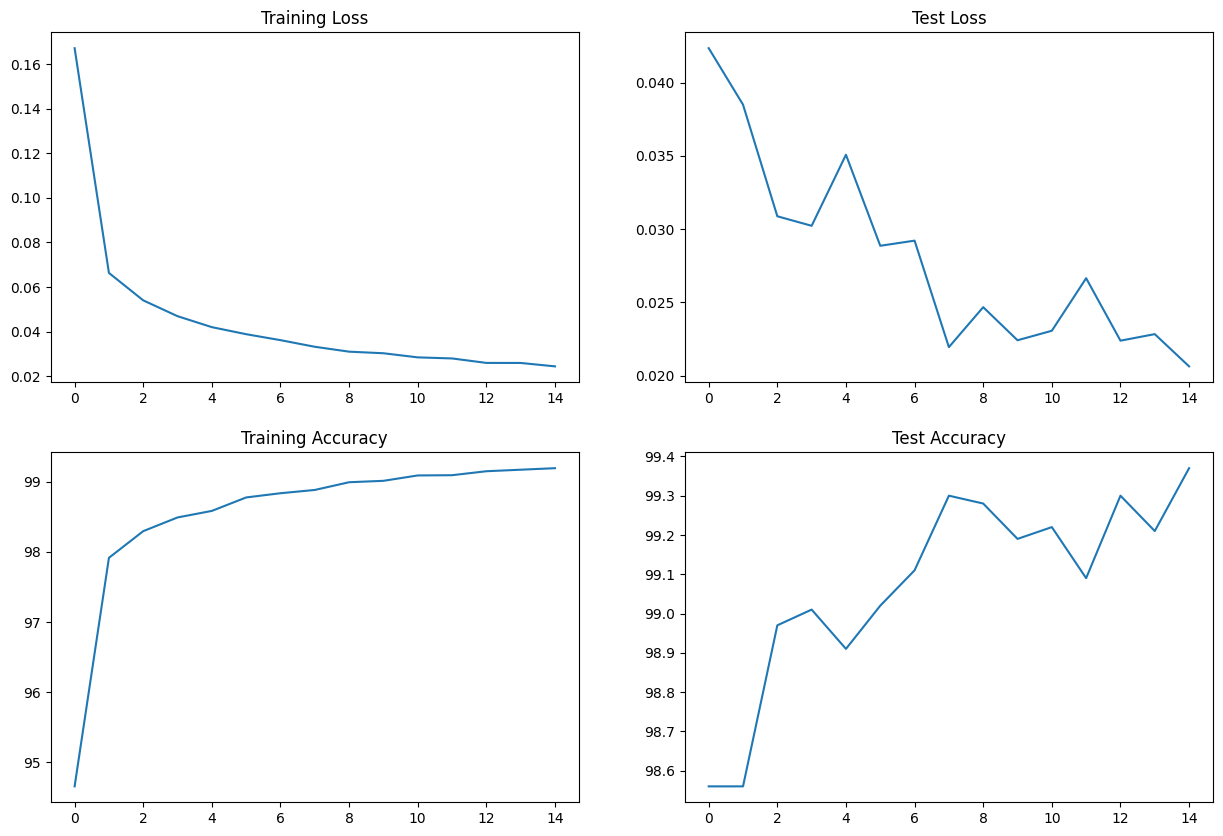

In [10]:
from utils import plot_stats
plot_stats()

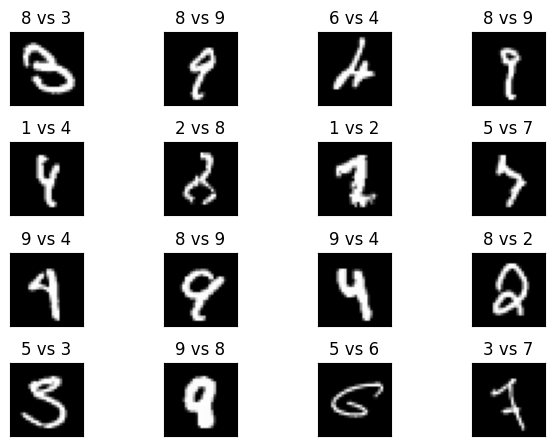

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual